<h1>
# Team G
</h1> <h3>
Evangelou Sotiris 2159 <br>
Kalais Konstantinos 2146 <br>
Chatziefremidis Leuteris 2209 <br>
</h3>

<h1>Simple Regression using our own code</h1>
<hr/>

MSE: [0.0098029]
R^2: [0.99509697]


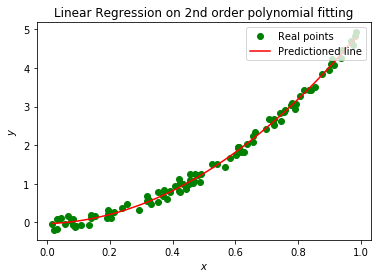

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

"""
    Polynomial Regression:
        y = Xβ , β = (X.T* X)^-1 * (X.T * y) 
        X=[[1 x0 x0^2 .....]
           [1 x1 x1^2 .....]
           ....
           [1 xn xn^2 .....]
          ]
"""

# Plot the x,y with the predictions
def graph_preds(x,y,predictions):
    plt.title("Linear Regression on 2nd order polynomial fitting")
    real = plt.plot(x,y,'o',color='g', label="Real points")
    preds = plt.plot(x,predictions,color='r', label="Predictioned line")
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc="upper right")
    plt.show()

# Generate random x,y based on the below formula
def dataset_generator(order):
    x = np.random.rand(100,1)
    y = 5*x*x + 0.1*np.random.randn(100,1)
    x_data = []
    for i in x:
        new_row = []
        for j in range(order+1):
            new_row.append(pow(i,j))
        x_data.append(new_row)
    x_data = np.array(x_data)
    x_data = np.reshape(x_data, (x_data.shape[0],x_data.shape[1]))
    return np.array(x_data),x,y

#Inverse given matrix
def inverse(x):
    return(np.linalg.inv(x))

#Find the β for the polynomial regression
def slope(x,y):
    
    #Transpose X
    transposed_x = x.T
    
    # X.T * X
    first_part = np.dot(transposed_x,x)
    
    # (X.T * X)^-1
    first_part  = inverse(first_part)
    
    #X.T *y
    second_part = np.dot(transposed_x,y)
    return first_part.dot(second_part)

#Calculate the Mean Squared Error(MSE)
def MSE_error(y,y_pred):
    n = len(y)
    sum_MSE = 0
    for i in range(n):
        sum_MSE += (y[i]-y_pred[i])**2
    return sum_MSE / n

#Calculate the score
def Rsqr_error(y,y_pred):
    n = len(y)
    sum1 = 0
    for i in range(n):
        sum1 += pow(y[i]-y_pred[i],2)
    sum2 = 0
    for i in range(n):
        sum2 += pow(y[i]-np.mean(y),2)
    return 1 - sum1/sum2

#Sort the list for the plot
def sort_n_keep_indexes(list1):
    tuple_list = []
    for i in range(len(list1)):
        tuple_list.append((list1[i],i))

    tuple_list = sorted(tuple_list, key= lambda x: x[0])
    index_list = []
    list1 = []
    for i in tuple_list:
        (a,b) = i 
        list1.append(a)
        index_list.append(b)
    return(list1,index_list)

#Sort the list for the plot
def sort_based_on_index(list1, indexes):
    temp = []
    for i in indexes:
        temp.append(list1[i])
    return temp


def minimize_Qb(x,points,y):
    
    #Find the slope
    b = slope(x,y)
    
    #Make the predictions
    y_pred = x.dot(b) 
    return np.array(y_pred)

#Train the models and make the predictions
(feat,x,lab) = dataset_generator(2) 
preds = minimize_Qb(feat,x,lab)

#Print out the error
print("MSE: " + str(MSE_error(lab,preds)))
print("R^2: " + str(Rsqr_error(lab,preds)))

#Sort the points and make the graph
(x, indexes) = sort_n_keep_indexes(x)
lab = sort_based_on_index(lab, indexes)
preds = sort_based_on_index(preds, indexes)
graph_preds(x,lab,preds)

<h1>Simple Regression using scikit-learn library</h1>
<hr/>

MSE: 0.009693500186248809
R^2: 0.9951649260870785


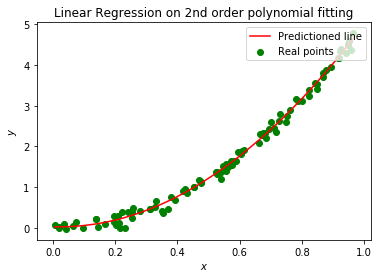

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import operator

#Generate random points with noise
m=100
x =np.random.rand(m,1)
y =5*x*x+0.1*np.random.randn(m,1)

#Define the degree of output function
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

#Create the model and predict
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#Calculate the two types of error
mse = mean_squared_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print("MSE: "+str(mse))
print("R^2: "+str(r2))

#Plot the points 
plt.scatter(x, y ,color='green',label="Real points")

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

#Plot the predicted ones
plt.plot(x, y_poly_pred, color='r',label="Predictioned line")
plt.title("Linear Regression on 2nd order polynomial fitting")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc="upper right")
plt.show()

<h1>Exercise 3</h1>
<hr/>
<p>
    <h3>Assumptions in multiple linear regression model</h3>
    An assumption we need for the model y=Xβ + ε:
    <br/>
    <br/>
    $\rightarrow E(\varepsilon\varepsilon^{T}) = \sigma^2 {I}$
    <br/>
</p>
<p>
    $$\text{From simple linear regression, assuming that b is an approximation of β for the model y = Xβ+ ε}\implies b=(X^{T}X)^{-1}(X^{T}y)$$ <br>
    $$\textbf{error of b} \implies e* = β-b = β - (X^{T}X)^{-1}(X^{T}y) = β - (X^{T}X)^{-1}(X^{T}(Xβ + ε)) = β - (X^{T}X)^{-1}(X^{T}X)β - (X^{T}X)^{-1}X^{T}ε = \\ β - β - (X^{T}X)^{-1}X^{T}ε = - (X^{T}X)^{-1}X^{T}ε$$
</p>
<p>
    <h4> Covariance- Variance Matrix </h4> <br>
    $b = (b_{1},b_{2},...,b_{n})^{T}\\Var(b)=[Var(b)_{i,j}] \text{ where }\\
   Var(b)_{i,j} =\begin{cases}
               \\Cov(b)_{i,j} = E[(b_{i}-E[b_{i}])(b_{j}-E[b_{j}])] \text{, for } i\neq j
               \\Cov(b)_{i,i} = E[(b_{i}-E[b_{i}])^{2}] \text{, for } i = j
            \end{cases}
$
    
</p>
<p>
    From the covariance-variance matrix of b is :
    <br/>
    $$ Var(b) = E(b-β)(b-β)^{T} $$
    $$ Var(b) = E[(Χ^{T}Χ)^{-1}X^{T}\varepsilon[(Χ^{T}Χ)^{-1}X^{T}\varepsilon]^{T}]$$
    $$ Var(b) = E[(Χ^{T}Χ)^{-1}X^{T}\varepsilon\varepsilon^{T}X(X^{T}X)^{-1}]$$
    $$ Var(b) = (Χ^{T}Χ)^{-1}X^{T}E(\varepsilon\varepsilon^{T})X(X^{T}X)^{-1} $$
    $$ Var(b) = (Χ^{T}Χ)^{-1}X^{T}\sigma^2{I}X(X^{T}X)^{-1} $$
    $$ Var(b) = \sigma^2[(Χ^{T}Χ)^{-1}X^{T}X{I}](X^{T}X)^{-1} $$
    $$ Var(b) =\sigma^2I(Χ^{T}Χ)^{-1} $$
    $$ Var(b) =\sigma^2(Χ^{T}Χ)^{-1} $$
    
</p>

<p>
    $\href{}{}$
</p>

<h3> References </h3>
<h5>
$\href{http://home.iitk.ac.in/~shalab/regression/Chapter3-Regression-MultipleLinearRegressionModel.pdf}{IITKanpurpdf}$
    </h5>